# Analyse control tumour growth

## 1. Import data

In [2]:
import os
import pandas as pd

# Import data
path = os.getcwd()
data_raw = pd.read_csv(path + '/data/Ctrl_Growth_LXF.csv')

# Filter relevant information
data = data_raw[['#ID', 'TIME', 'Y']]

# Convert TIME and Y to numeric values (currently strings)
data['TIME'] = pd.to_numeric(data['TIME'], errors='coerce')
data['Y'] = pd.to_numeric(data['Y'], errors='coerce')

# Sort TIME values (for plotting convenience)
data.sort_values(by='TIME', inplace=True)

# Show data
data

,#ID,TIME,Y
0,40,0,191.8080
1,94,0,77.2475
2,95,0,186.2000
63,170,0,80.0565
62,169,0,123.0080
...,...,...,...
102,170,30,620.6265
77,136,30,1459.3425
103,94,30,576.2400
67,140,30,2122.5820


## 2. Visualise observed tumour growth

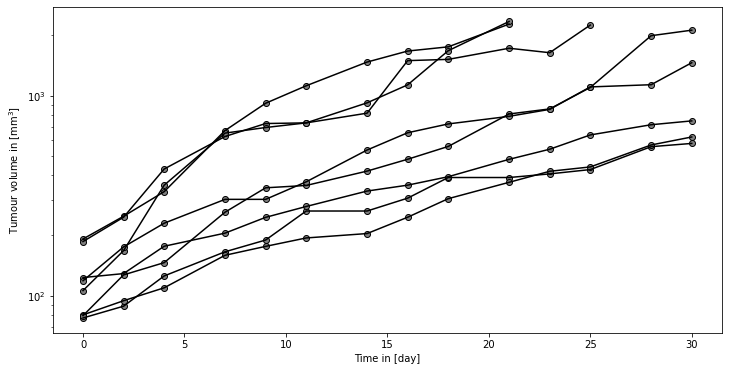

In [3]:
import matplotlib.pyplot as plt

# Get unique animal IDs
ids = data['#ID'].unique()

# Plot measurements
fig = plt.figure(figsize=(12, 6))

for i in ids:
    # Mask for individual
    mask = data['#ID'] == i
    time = data[mask]['TIME']
    volume = data[mask]['Y']

    # Filter out Nan values
    mask = volume.notnull()
    time = time[mask]
    volume = volume[mask]

    # Create semi log plot
    plt.semilogy(time, volume, color='black')
    plt.scatter(time, volume, color='gray', edgecolor='black')

# Label axes
plt.xlabel('Time in [day]')
plt.ylabel(r'Tumour volume in [mm$^3$]')

plt.show()